In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.shape

(244, 7)

In [21]:
# ilk kolunu secmek
df.iloc[:,0:1]

df.loc[:, 'total_bill']

df['total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [63]:
df.iloc[:,0:1].head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [64]:
df.loc[:, 'total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [104]:
#ilk kolondan rastgele 50 deger secmek

np.random.seed(123)
r1 = np.random.randint(0,243, 50)
r1

array([109, 126,  66, 220,  98, 230,  17,  83, 106, 123,  57, 214, 225,
        96, 113, 126,  47,  73,  32, 174, 224, 111, 153,  83,  78, 164,
        96, 208,  68,  49,  55, 195,   2,  84,  39,  66,  84,  47, 189,
       176, 135, 105,  99, 124,  92, 180, 102,  97, 213, 118])

In [105]:
r1.mean()

115.42

In [106]:
r1.size

50

In [107]:
r1.sort()
r1

array([  2,  17,  32,  39,  47,  47,  49,  55,  57,  66,  66,  68,  73,
        78,  83,  83,  84,  84,  92,  96,  96,  97,  98,  99, 102, 105,
       106, 109, 111, 113, 118, 123, 124, 126, 126, 135, 153, 164, 174,
       176, 180, 189, 195, 208, 213, 214, 220, 224, 225, 230])

In [108]:
r1 = np.unique(r1)
print(r1.size)
r1

44


array([  2,  17,  32,  39,  47,  49,  55,  57,  66,  68,  73,  78,  83,
        84,  92,  96,  97,  98,  99, 102, 105, 106, 109, 111, 113, 118,
       123, 124, 126, 135, 153, 164, 174, 176, 180, 189, 195, 208, 213,
       214, 220, 224, 225, 230])

In [109]:
# ilk kolondan listedeki indexleri secmek

olcumler = df['total_bill'][r1]
olcumler.head()

2     21.01
17    16.29
32    15.06
39    31.27
47    32.40
Name: total_bill, dtype: float64

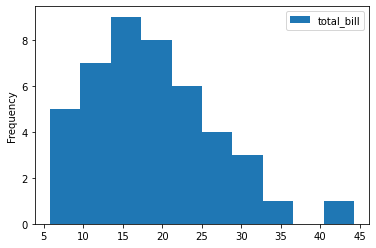

In [110]:
# Normallik Varsayimi

# histogram

pd.DataFrame(olcumler).plot.hist();

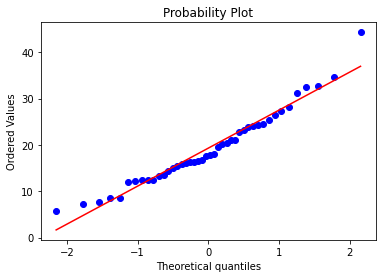

In [111]:
#qqplot
import scipy.stats as stats
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

In [97]:
# Shapiro Testi

from scipy.stats import shapiro

In [98]:
# H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlanmli bir farklilik yoktur

# H1: ... fark vardır

In [112]:
shapiro(olcumler)

ShapiroResult(statistic=0.9598000049591064, pvalue=0.12792380154132843)

In [113]:
df.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [114]:
r1.size

44

In [115]:
r1.mean()

119.75

In [103]:
pd.DataFrame(r1).describe().T

,count,mean,std,min,25%,50%,75%,max
0,44.0,119.75,62.130817,2.0,76.75,107.5,174.5,230.0


In [124]:
# Testin Uygulanmasi

stats.ttest_1samp(olcumler, popmean=100)

Ttest_1sampResult(statistic=-65.77399865940738, pvalue=8.622295306419527e-45)

In [125]:
?stats.ttest_1samp

Signature:
stats.ttest_1samp(
    a,
    popmean,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
)
Docstring:
Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.

Parameters
----------
a : array_like
    Sample observation.
popmean : float or array_like
    Expected value in null hypothesis. If array_like, then it must have the
    same shape as `a` excluding the axis dimension.
axis : int or None, optional
    Axis along which to compute test; default is 0. If None, compute over
    the whole array `a`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignorin